<a href="https://colab.research.google.com/github/geekevgin/-Python/blob/main/Homework_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages("skimr")
install.packages("psych")
install.packages("lsr")
install.packages("effsize")
install.packages("tibble")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘mnormt’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
library(tidyverse)
require(readxl)
library(skimr)
library(psych)
library(tibble)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ purrr::%||%()   masks base::%||%()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: readxl


Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




In [3]:
meta <- read_xlsx('/content/metadata.xlsx', sheet =1)
meta <- rename_with(meta, make.names)
meta <- select(meta, -Name, -Sucrose)
meta <- mutate(meta,Patient.number = as.factor(Patient.number),
              Vial.number = as.factor(Vial.number),
              Group = as.factor(Group),
              Sm = as.factor(Sm),
              LVH = as.factor(LVH),
              IHD = as.factor(IHD),
              MI = as.factor(MI),
              Str = as.factor(Str),
              A_C = as.factor(A_C),
              A_H = as.factor(A_H),
              A_D = as.factor(A_D))



In [4]:
attr(meta$Ht, "label") <- "Growth"
attr(meta$Wt, "label") <- "Weight"
attr(meta$BMI, "label") <- "Body mass index"
attr(meta$Sys, "label") <- "Systolic blood pressure"
attr(meta$Dia, "label") <- "Diastolic blood pressure"
attr(meta$PR, "label") <- "Pulse"
attr(meta$Sm, "label") <- "Smoking"
attr(meta$Dm, "label") <- "Diabetes"
attr(meta$HT, "label") <- "Hypertension"
attr(meta$LVH, "label") <- "Left ventricular hypertrophy by electrocardiogram"
attr(meta$MI, "label") <- "Medical history of infarction"
attr(meta$Str, "label") <- "Medical history of stroke"
attr(meta$A_C, "label") <- "Family history of CAD"
attr(meta$A_H, "label") <- "Family history hypertension"
attr(meta$A_D, "label") <- "Family history diabetes"
attr(meta$Choi...25, "label") <- "Cholesterol"
attr(meta$Choi...29, "label") <- "Cholesterol"
attr(meta$Tgi...26, "label") <- "Triglycerides"
attr(meta$Tgi...30, "label") <- "Triglycerides"
attr(meta$HDLi...27, "label") <- "High density lipoprotein"
attr(meta$HDLi...31, "label") <- "High density lipoprotein"
attr(meta$LDLi...28, "label") <- "Low density lipoprotein"
attr(meta$LDLi...32, "label") <- "Low density lipoprotein"
attr(meta$AI, "label") <- "Atherogenicity index"



In [5]:
install.packages("boot")
library("boot")
install.packages("bootstrap")
library("bootstrap")
install.packages("coin")
library("coin")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘boot’


The following object is masked from ‘package:psych’:

    logit


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘zoo’, ‘TH.data’, ‘sandwich’, ‘libcoin’, ‘matrixStats’, ‘modeltools’, ‘mvtnorm’, ‘multcomp’


Loading required package: survival


Attaching package: ‘survival’


The following object is masked from ‘package:boot’:

    aml




In [ ]:
# Рассмотрим уровни холестрина у людей с ГБ и без ГБ

# Н0 различий уровня холестрина у пациентов с ГБ и без ГБ нет
# H1 различия есть
# НП - категориальная перемення HT
# ЗП - непрерывная переменная уровень холестерина Choi...29

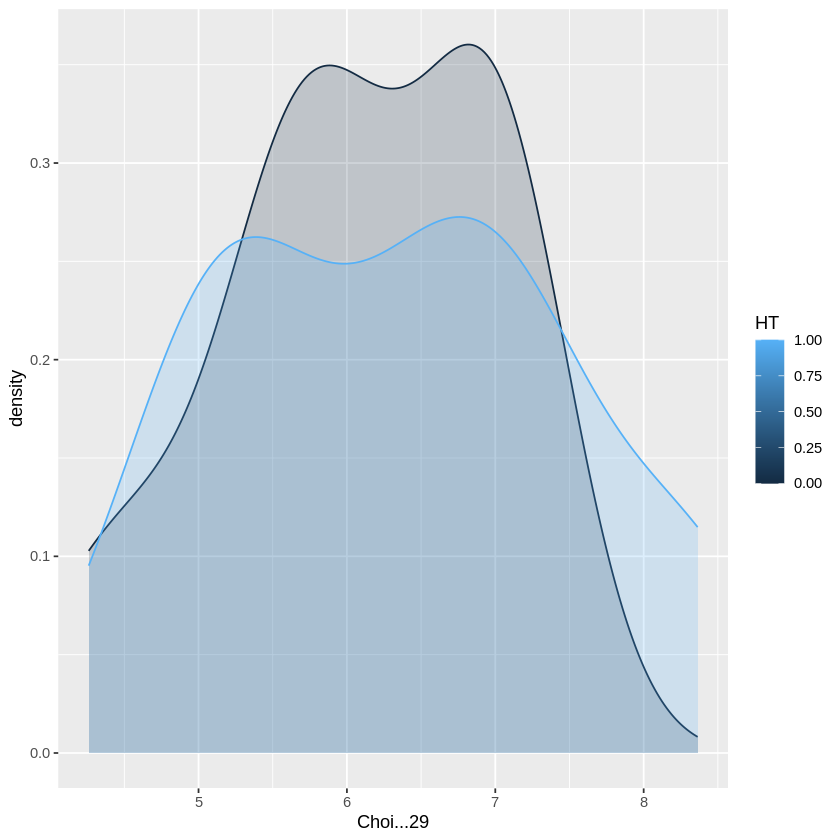

In [6]:
# Посмотрим на распределение по холестерина по группам
# Судя по графику кажется, что оба распределения стремятся с нормальному, хотя на веркушке заметны два горба, со смещением
ggplot(meta, aes(x = Choi...29, col = HT, fill = HT, group = HT))  + geom_density(alpha = 0.2)


	Shapiro-Wilk normality test

data:  meta$Choi...29[meta$HT == 0]
W = 0.92981, p-value = 0.2711


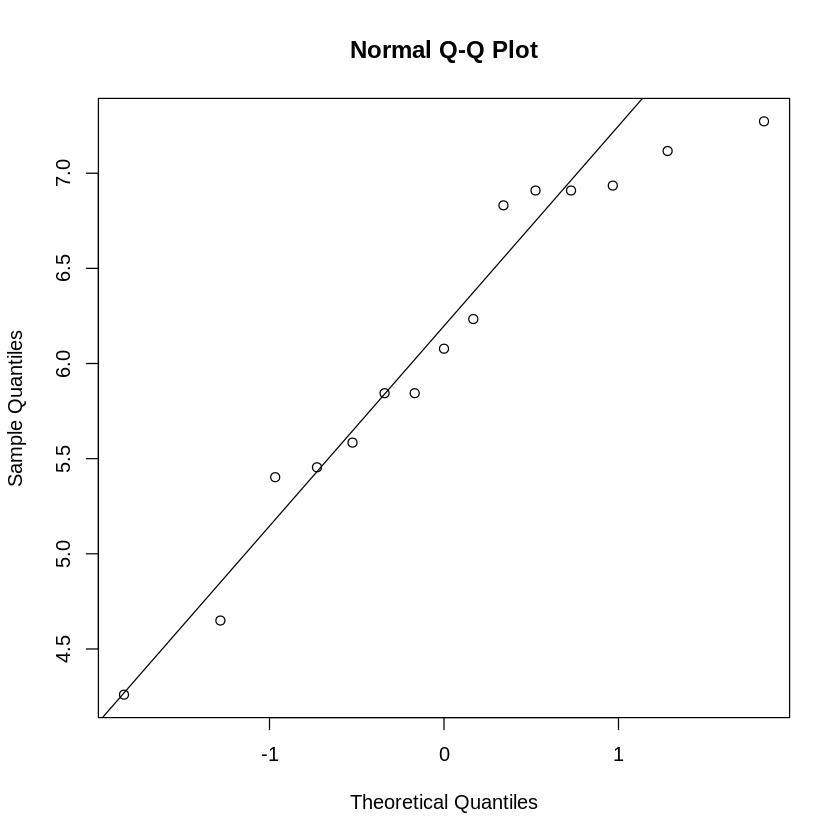

In [7]:
# Распределение холестерина в группе пациентов без ГБ
# Распредедение стремится к нормальному
qqnorm(meta$Choi...29[meta$HT == 0])
qqline(rnorm(200, mean(meta$Choi...29[meta$HT == 0]), sd = sd(meta$Choi...29[meta$HT==0])))

shapiro.test(meta$Choi...29[meta$HT == 0])


	Shapiro-Wilk normality test

data:  meta$Choi...29[meta$HT == 1]
W = 0.94521, p-value = 0.2322


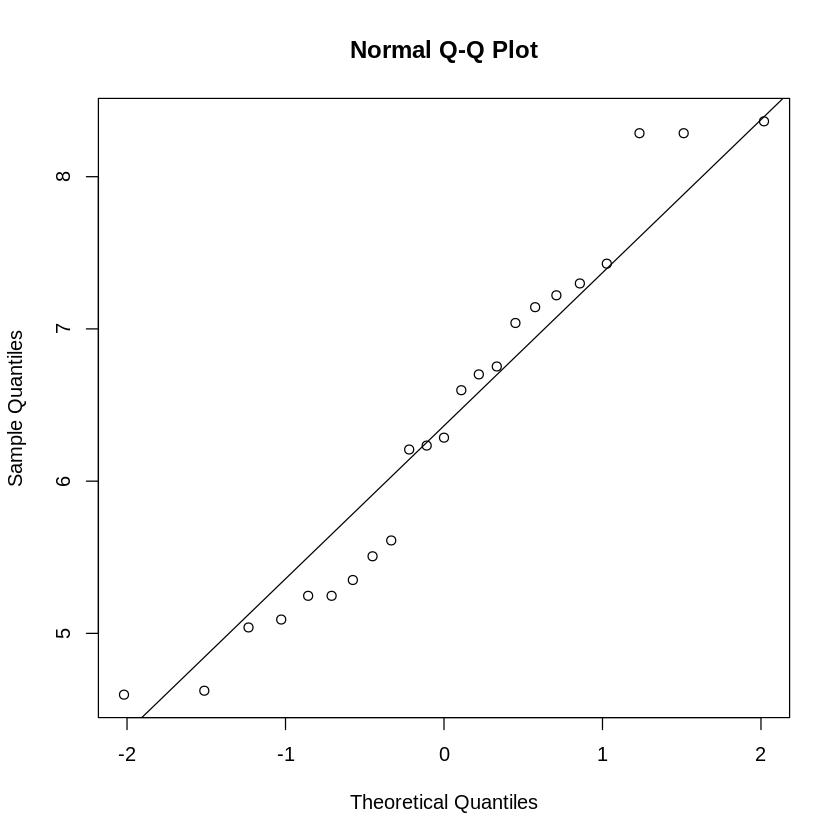

In [8]:
# Распределение холестерина в группе пациентов с ГБ
# Распредедение стремится к нормальному
qqnorm(meta$Choi...29[meta$HT == 1])
qqline(rnorm(200, mean(meta$Choi...29[meta$HT == 1]), sd = sd(meta$Choi...29[meta$HT==1])))

shapiro.test(meta$Choi...29[meta$HT == 1])

In [9]:
# Тк распеделение стремится к нормальному, то можем использовать t-тест
# Разницы средних в двух группах нет
meta %>%
  t.test(Choi...29 ~ HT, data = .)


	Welch Two Sample t-test

data:  Choi...29 by HT
t = -0.78493, df = 34.613, p-value = 0.4378
alternative hypothesis: true difference in means between group 0 and group 1 is not equal to 0
95 percent confidence interval:
 -0.9552850  0.4227045
sample estimates:
mean in group 0 mean in group 1 
       6.088312        6.354602 



ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = meta$Choi...29[meta$HT == 0], statistic = myfn_mean, 
    R = 1500)


Bootstrap Statistics :
    original      bias    std. error
t1* 6.088312 0.004491775   0.2254306

2.5%    97.5% 
5.637100 6.505714

[1] 6.088312

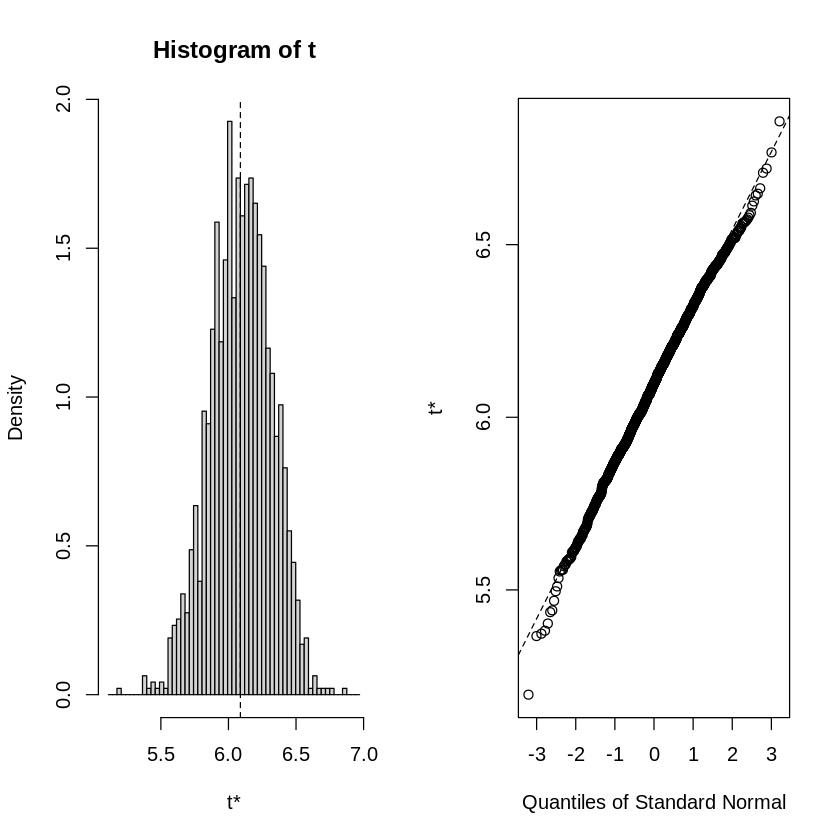

In [10]:
myfn_mean <- function(x, i) {return(sum(x[i])/length(x[i]))}  #функция для расчета среднего по индексам
result_HT_0 <- boot(meta$Choi...29[meta$HT == 0], myfn_mean, R = 1500)  #бутстрэп-анализ
result_HT_0
plot(result_HT_0)
quantile(result_HT_0$t, c(0.025, 0.975)) #доверительный интервал для среднеарифметического
mean(meta$Choi...29[meta$HT == 0])



ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = meta$Choi...29[meta$HT == 1], statistic = myfn_mean, 
    R = 1500)


Bootstrap Statistics :
    original      bias    std. error
t1* 6.354602 0.007122906    0.237824

2.5%    97.5% 
5.898899 6.829023

[1] 6.354602

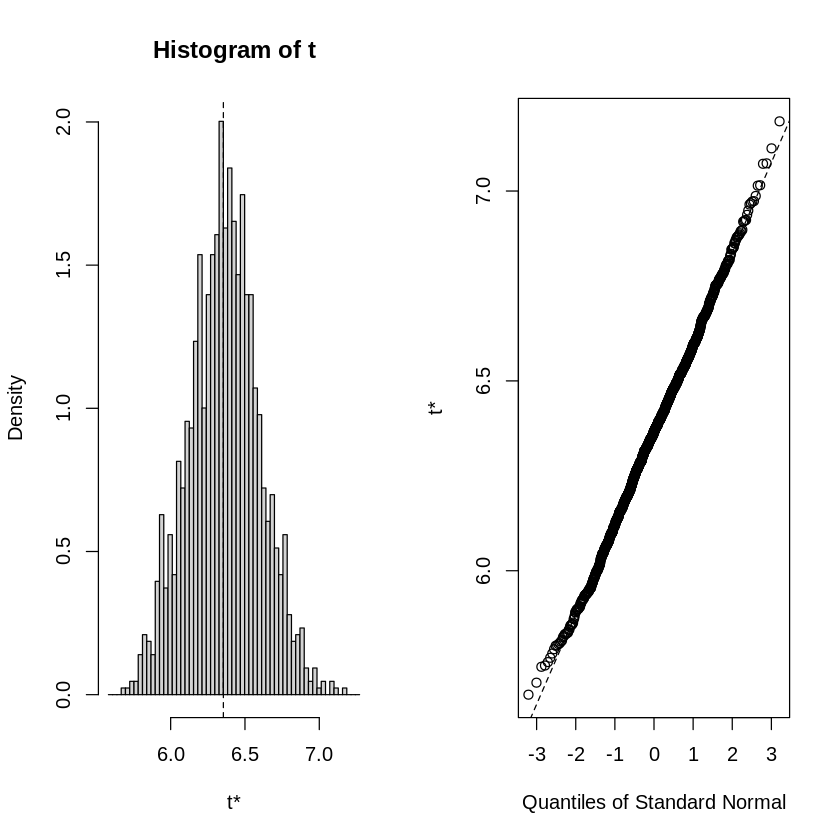

In [11]:
myfn_mean <- function(x, i) {return(sum(x[i])/length(x[i]))}  #функция для расчета среднего по индексам
result_HT_1 <- boot(meta$Choi...29[meta$HT == 1], myfn_mean, R = 1500)  #бутстрэп-анализ
result_HT_1
plot(result_HT_1)
quantile(result_HT_1$t, c(0.025, 0.975)) #доверительный интервал для среднеарифметического
mean(meta$Choi...29[meta$HT == 1])

In [ ]:
# Разницы между средними средних на boot и t-test нет
# Распределение средняя средних нормальное
# Выборка является достаточно хорошей, возможно работать с ней без boot

$jack.se
[1] 0.2366183

$jack.bias
[1] 0

$jack.values
 [1] 6.124304 6.029685 6.003711 6.027829 6.029685 6.191095 6.035250 6.137291
 [9] 6.105751 6.133581 6.077922 6.014842 6.105751 6.218924 6.089054

$call
jackknife(x = meta$Choi...29[meta$HT == 0], theta = theta)


Warning message in geom_vline(xintercept = mean(meta$Choi...29[meta$HT == 0]), color = "red3", :
“Ignoring unknown parameters: `pty`”
Warning message in geom_vline(xintercept = mean(results$jack.values), color = "green2", :
“Ignoring unknown parameters: `pty`”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


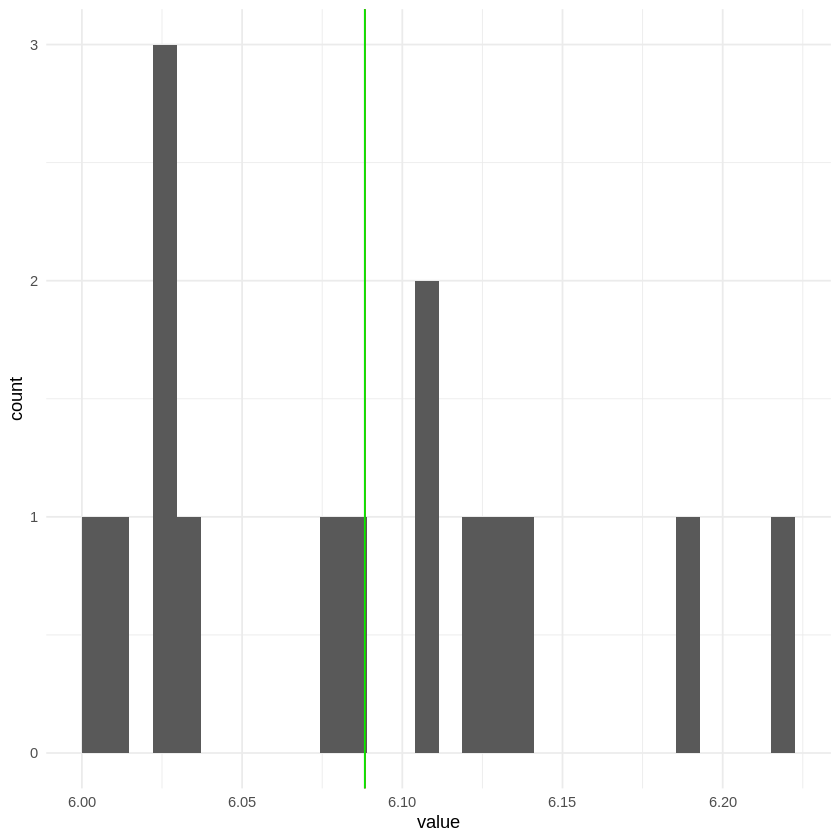

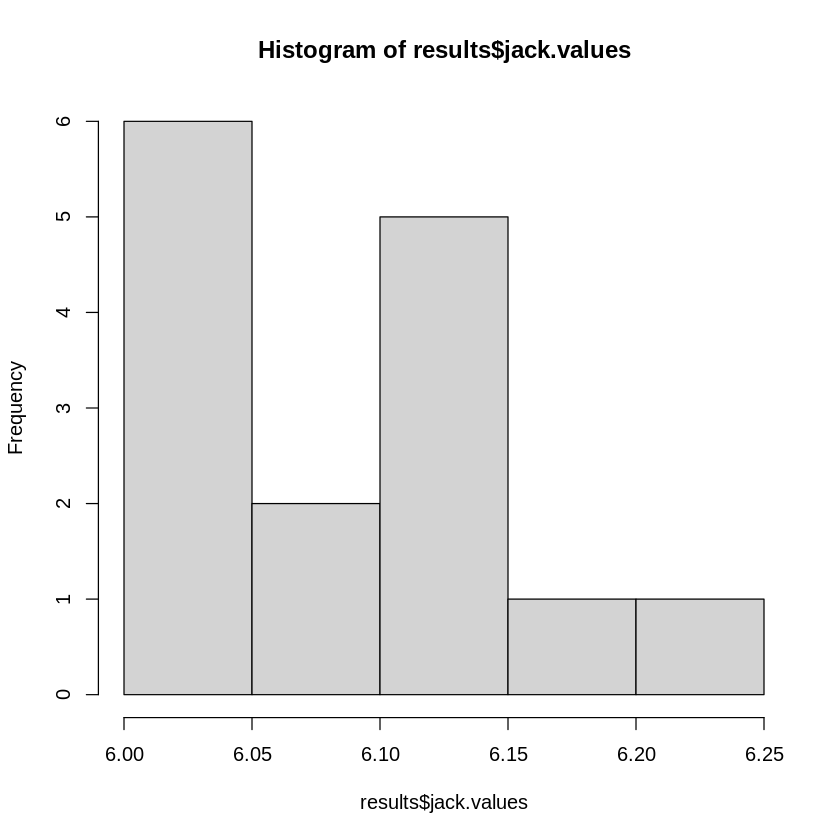

In [12]:
theta <- function(x){mean(x)}

results <- jackknife(meta$Choi...29[meta$HT == 0], theta)
results

ggplot(as_tibble(results$jack.values), aes(value)) +
  geom_histogram() +
  geom_vline(xintercept = mean(meta$Choi...29[meta$HT == 0]), color = 'red3', pty = 1) +
  geom_vline(xintercept = mean(results$jack.values), color = 'green2', pty = 1) +
  theme_minimal()

hist(results$jack.values)


In [ ]:
# две линии совпадают средняя выборки и средняя средних. jackknife и boot выдали одинаковые значения
# наша выборка хорошо описывает среднее

In [13]:
#Permutation Test
oneway_test(Choi...29 ~ Group, meta)
summary(aov(Choi...29 ~ Group, meta))


	Asymptotic Two-Sample Fisher-Pitman Permutation Test

data:  Choi...29 by Group (0, 1)
Z = -0.2816, p-value = 0.7782
alternative hypothesis: true mu is not equal to 0


            Df Sum Sq Mean Sq F value Pr(>F)
Group        1   0.09  0.0907   0.077  0.783
Residuals   36  42.22  1.1727               

In [ ]:
# p-value = 0.7782 позволяет отвергнуть H0
#  тест не обнаруживает статистически значимых различий между выборками c уровнем холестерина с ГБ и без ГБ
# разница средних -0,1818182.
